In [1]:


# venn diagram
# generate heatmap
# generate PCA

In [2]:
import os, pandas, supervenn
import venny4py, venny4py.venny4py


In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

In [4]:
# get response genes

In [5]:
results_dir = '/Users/adrian/research/akureyri/results/sleuth_pipeline/'

In [6]:
elements = os.listdir(results_dir)
working_files = [element for element in elements if 'formatted' in element]
print(working_files)

response_genes = {}
for file in working_files:
    label = file.split('.formatted')[0]
    input_file = results_dir + file
    df = pandas.read_csv(input_file, sep='\t', index_col=0)
    genes = df.index.to_list()
    response_genes[label] = genes
    print(label, len(genes))

['effect_culture_day14.formatted_results.tsv', 'effect_culture_day2.formatted_results.tsv', 'effect_time_3D.formatted_results.tsv', 'effect_time_2D.formatted_results.tsv']
effect_culture_day14 399
effect_culture_day2 1487
effect_time_3D 654
effect_time_2D 111


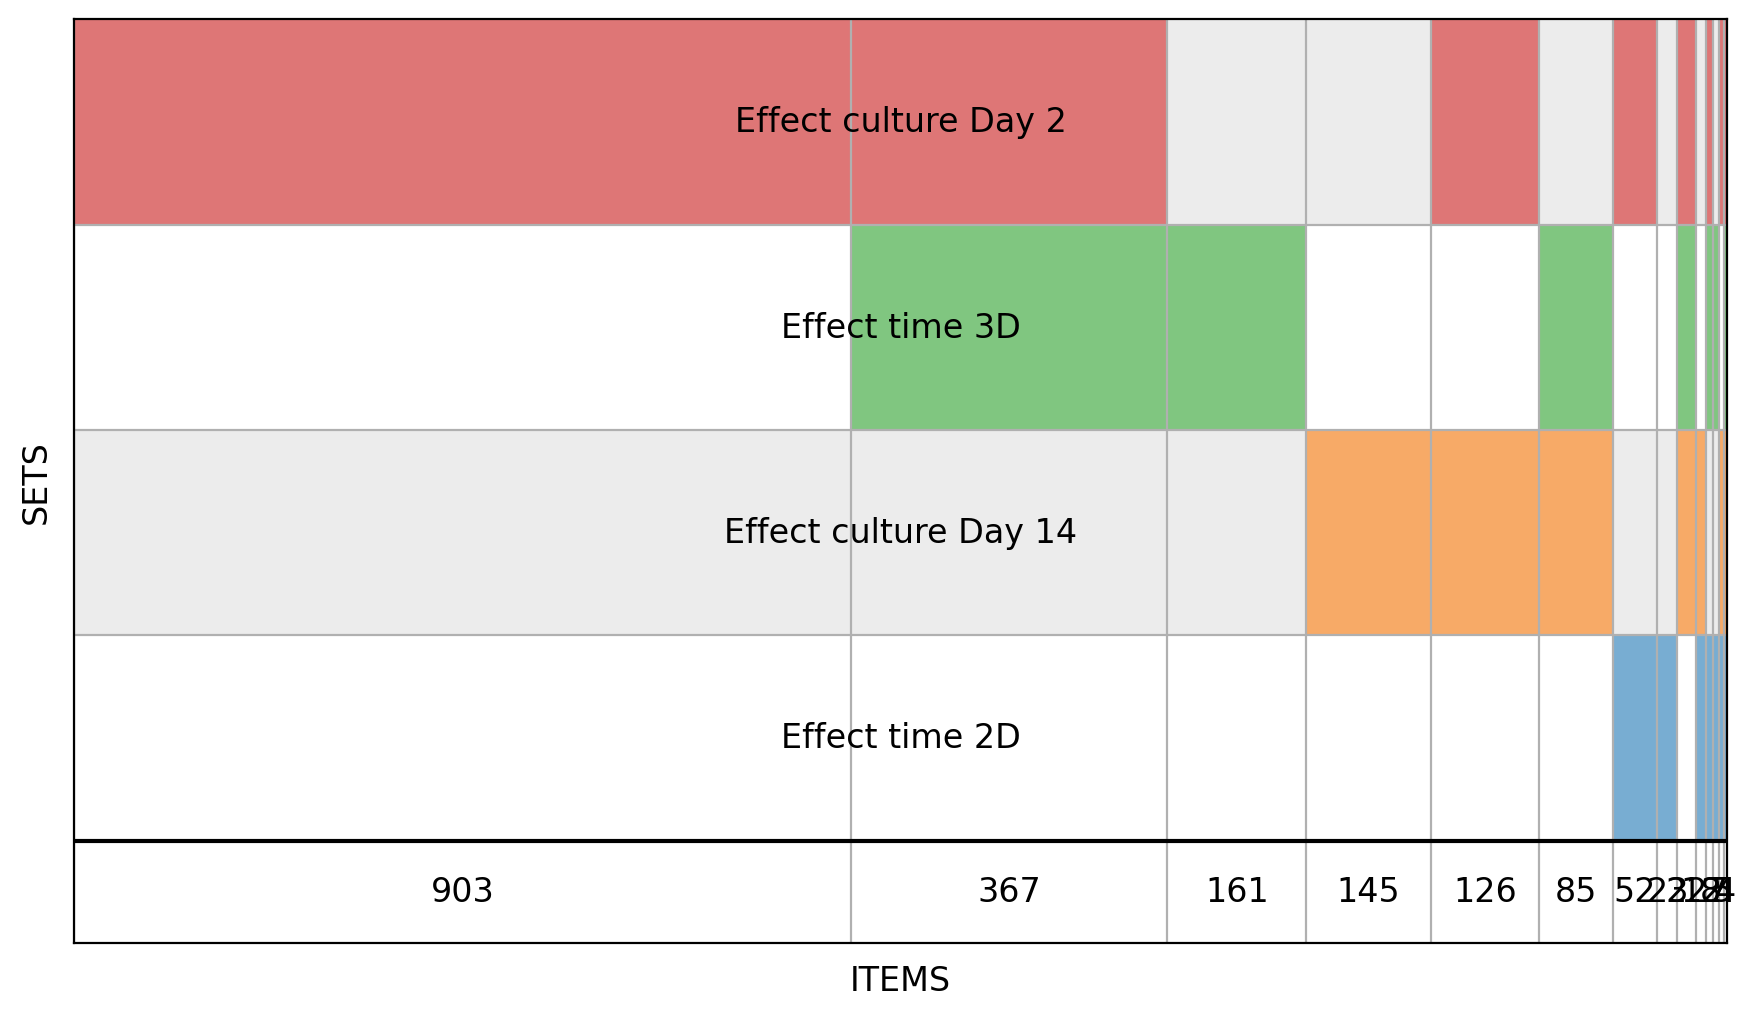

{'ENSG00000012171',
 'ENSG00000013016',
 'ENSG00000049323',
 'ENSG00000067064',
 'ENSG00000074410',
 'ENSG00000078018',
 'ENSG00000099194',
 'ENSG00000101335',
 'ENSG00000104549',
 'ENSG00000105976',
 'ENSG00000107960',
 'ENSG00000108821',
 'ENSG00000110921',
 'ENSG00000120437',
 'ENSG00000124762',
 'ENSG00000128271',
 'ENSG00000129226',
 'ENSG00000130635',
 'ENSG00000132561',
 'ENSG00000133110',
 'ENSG00000134824',
 'ENSG00000134853',
 'ENSG00000135318',
 'ENSG00000135919',
 'ENSG00000136158',
 'ENSG00000139289',
 'ENSG00000141469',
 'ENSG00000147383',
 'ENSG00000148357',
 'ENSG00000160326',
 'ENSG00000161513',
 'ENSG00000163513',
 'ENSG00000163814',
 'ENSG00000166825',
 'ENSG00000167508',
 'ENSG00000168010',
 'ENSG00000168918',
 'ENSG00000169439',
 'ENSG00000169710',
 'ENSG00000170485',
 'ENSG00000172296',
 'ENSG00000172893',
 'ENSG00000174307',
 'ENSG00000178031',
 'ENSG00000182985',
 'ENSG00000184347',
 'ENSG00000187957',
 'ENSG00000196975',
 'ENSG00000204219',
 'ENSG00000233521',


In [11]:
# venn diagram
# https://github.com/gecko984/supervenn
#https://stackoverflow.com/questions/71902175/create-venn-diagram-in-python-with-4-circles
sets = [
        set(response_genes['effect_culture_day2']),
        set(response_genes['effect_culture_day14']),
        set(response_genes['effect_time_2D']),
        set(response_genes['effect_time_3D'])
       ]
labels = ['Effect culture Day 2', 'Effect culture Day 14', 'Effect time 2D', 'Effect time 3D']
mso = supervenn.supervenn(sets, labels, 
                    side_plots=False, chunks_ordering='size', sets_ordering='size',
                   reverse_sets_order=False)

matplotlib.pyplot.show()
mso.chunks[frozenset([0, 2])] 
#plt.savefig('myplot.png')

# arent we interested in things that respond to change, so green three sets?
# how would you interpret the majority of 903 genes? are we interested in them? probablu not.
# set 903, already responsed on day 2 and not in day 14
# really need to reflect on what we want.
# are we really interested on thigs that are different on day 2 but never seen again? 
#### What about things that are observed on day 2, day 14 and also change or not with time in 3D??

### NEED TO GO OVER ALL EXHAUSTIVE CASES AS A HUMAN AND DECIDE

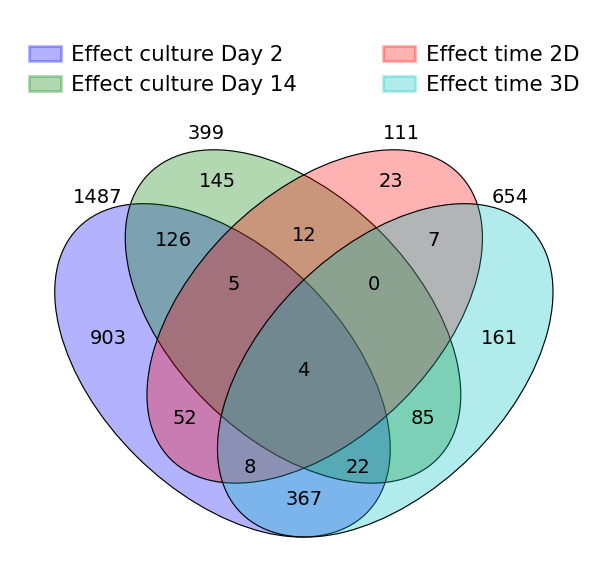

In [8]:
sets = {
    'Effect culture Day 2': set(response_genes['effect_culture_day2']),
    'Effect culture Day 14': set(response_genes['effect_culture_day14']),
    'Effect time 2D': set(response_genes['effect_time_2D']),
    'Effect time 3D': set(response_genes['effect_time_3D'])
}
    
venny4py.venny4py.venny4py(sets=sets)